In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##  خواندن فایل  data set

In [2]:
df = pd.read_excel("missing_dataset_falcon9.xlsx")

---------------------------------

# <font color='darkviolet' >مراحل پاک‌سازی داده‌ها </fomt>

## <font color='darkcyan' >1 -  حذف داده‌های تکراری </fomt>

In [3]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     81 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

### درصد داده های گم شده به شرح زیر هستند

In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing = np.round(percent_missing , decimals=2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
FlightNumber,FlightNumber,0.00
Date,Date,0.00
BoosterVersion,BoosterVersion,0.00
PayloadMass,PayloadMass,10.00
Orbit,Orbit,0.00
LaunchSite,LaunchSite,4.44
Outcome,Outcome,0.00
Flights,Flights,0.00
GridFins,GridFins,0.00
Reused,Reused,0.00


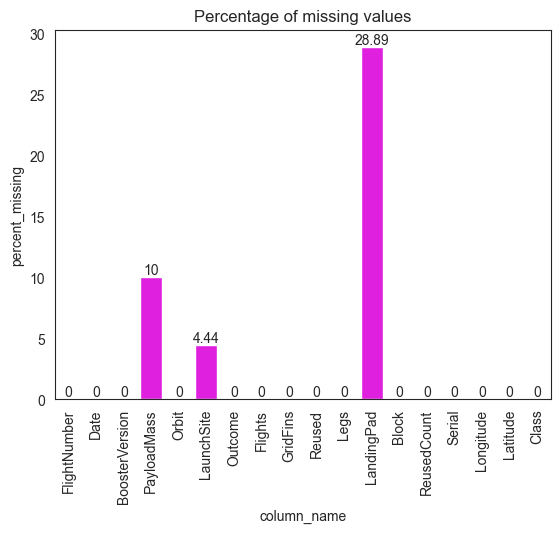

In [5]:
sns.axes_style('white')
sns.set_style('white')
ax = sns.barplot(x = missing_value_df['column_name'] , y=missing_value_df['percent_missing'] , color = '#FF00FF')
ax.set_title('Percentage of missing values')
ax.tick_params(axis='x', rotation=90 )

for container in ax.containers:
    ax.bar_label(container)



In [6]:
df = df.drop_duplicates() #remove duplicates

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     81 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

## <font color='darkcyan' >تعداد  سطرها 90 :  بعد از حذف داده های تکراری</fomt>
## پس داده تکراری وجو ندارد

# با استفاده از دستور info
### یک دیدکلی از دیتا ست بدست می آوریم 
### در این دیتا ست 90 سطر وجود دارد 
###  در ستون PayloadMass :   تعداد 81 سطر پرشده و 9 سطر بصورت تهی است
### در ستون LaunchSite : تعداد 86 سطر پرشده و 4 سطر بصورت تهی است
### در ستون LandingPad : تعداد 64 سطر پرشده و 26 سطر بصورت تهی است

## این سطرها باید تعیین تکلیف شوند


In [8]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

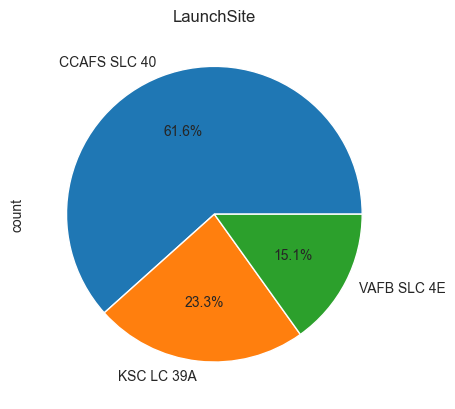

In [9]:
ax = df["LaunchSite"].value_counts().plot(kind="pie", title="LaunchSite" , autopct='%1.1f%%',)


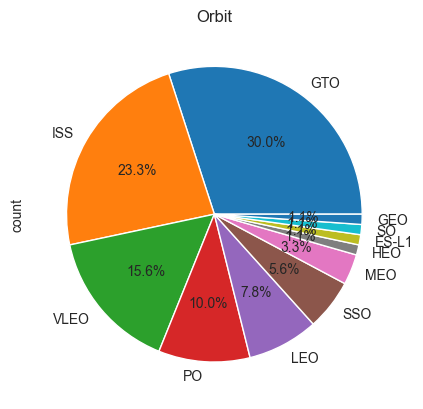

In [10]:
ax = df["Orbit"].value_counts().plot(kind="pie", title="Orbit" , autopct='%1.1f%%',)


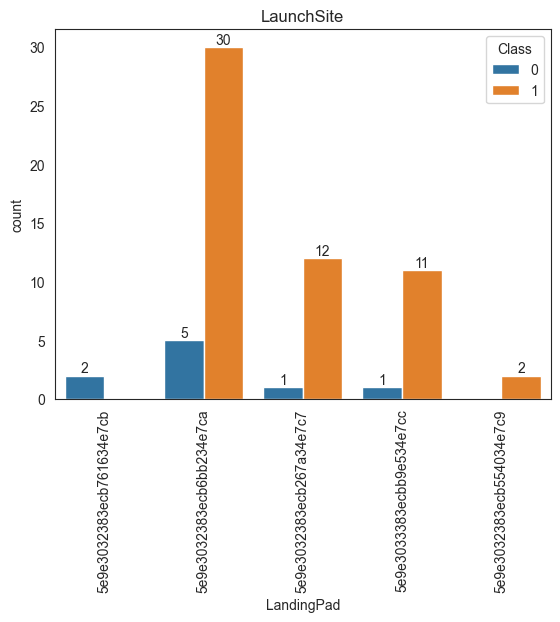

In [11]:
ax =  sns.countplot( x = 'LandingPad' ,data=df , hue='Class')
#df['highest_level_of_education'].value_counts().plot(kind='bar')
ax.tick_params(axis='x', rotation=90)
ax.set_title("LaunchSite")
for container in ax.containers:
    ax.bar_label(container)

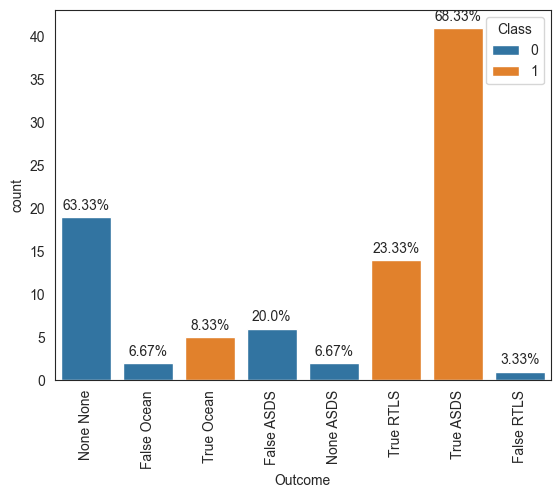

In [12]:
ax =  sns.countplot( x = 'Outcome' ,data=df , hue='Class')
totals = []
for container in ax.containers:
    total = 0
    for bar in container:
        total += bar.get_height()
    totals.append(total)

# Add value labels as percentages inside the bar
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        ax.annotate(str(round(bar.get_height()/totals[i]*100, 2)) + '%', 
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
ax.tick_params(axis='x', rotation=90)


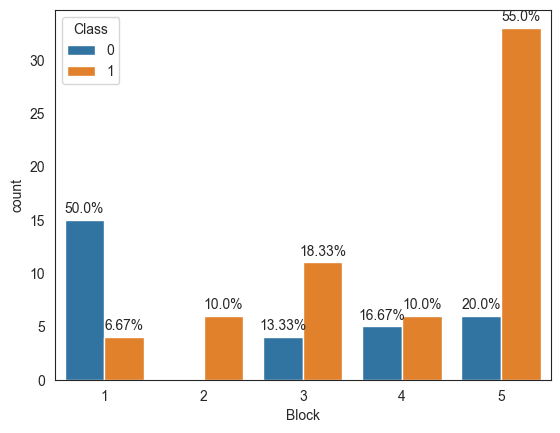

In [13]:
ax =  sns.countplot( x = 'Block' ,data=df , hue='Class')
totals = []
for container in ax.containers:
    total = 0
    for bar in container:
        total += bar.get_height()
    totals.append(total)

# Add value labels as percentages inside the bar
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        ax.annotate(str(round(bar.get_height()/totals[i]*100, 2)) + '%', 
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

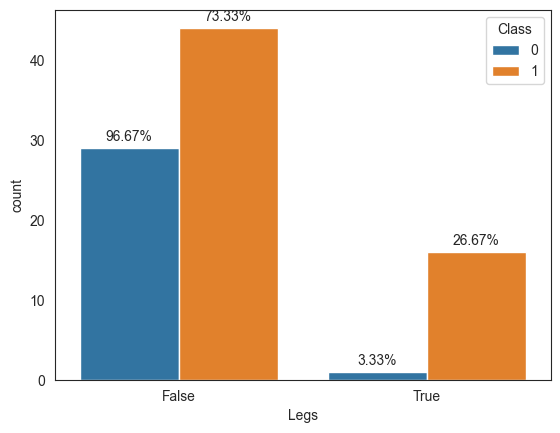

In [14]:
ax =  sns.countplot( x = 'Legs' ,data=df , hue='Class')
totals = []
for container in ax.containers:
    total = 0
    for bar in container:
        total += bar.get_height()
    totals.append(total)

# Add value labels as percentages inside the bar
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        ax.annotate(str(round(bar.get_height()/totals[i]*100, 2)) + '%', 
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



## <font color='darkcyan' >2. پر کردن مقادیر گم‌شده (Missing Values)</fomt>
### در این مرحله، مقادیر گم‌شده را با استفاده از میانگین، میانه یا مد پر می‌کنیم.


In [15]:
from scipy.stats import chi2_contingency

In [16]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [17]:
def my_chi2(df1 , df2):
    df_chi2 = {}

    
    r,c = df2.shape
    for i in range(c):
        contingency_table = pd.crosstab(df1, df2.iloc[:,i])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        #print(f"Chi-Square Test p-value {df2.columns[i]}: {p}")
        df_chi2[df2.columns[i]] = chi2
    


    print(len(df1))    

    ax = sns.barplot(df_chi2)
    ax.set_title('Correlation percentage based on the Chi-square test')
    ax.tick_params(axis='x', rotation=90)


90


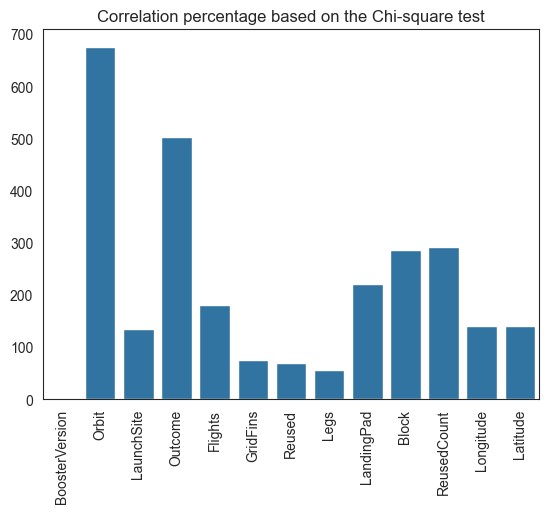

In [18]:
df_ch = df.drop(['FlightNumber', 'Date','Class' , 'PayloadMass' , 'Serial'] , axis = 1)
my_chi2(df['PayloadMass'], df_ch)


## <font color='purple' >PayloadMass</fomt>
###  روش اول-  میانگین جرم کل فالکن ها را در جاهای تهی قرار دهیم
###  روش دوم برمبنای سایر ستون ها 
#### از انجایی که جرم فالکن  می تواند تابعی از مداری باشد که در آن قرار می گیرد 
####  می توانیم میانگین وزنی موجود مدار های مختلف را پیدا کنیم و  سپس این مقادیر را جاگزین تهی ها کنیم

<Axes: xlabel='PayloadMass', ylabel='Count'>

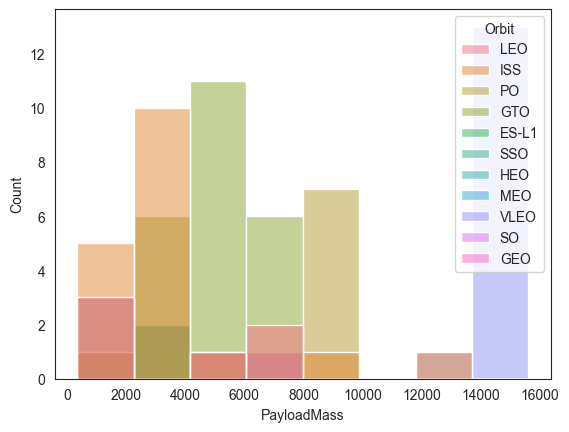

In [19]:
sns.histplot(x='PayloadMass' , data=df , hue="Orbit")

### در نمودار بالا جرم فالکن ها براساس مدار پرتابی رسم شده است 
### ملاحظه می شود که وزن فالکن ها تابعی از همین مدار ها است
### می توانیم داده های تهی را برساس میانگین وزنی مدارات قرار گیری  جایگزین کنیم

In [20]:
df['PayloadMass'] = df['PayloadMass'].fillna(df.groupby('Orbit')['PayloadMass'].transform('mean'))
# for each_orbit in df.groupby('Orbit')['PayloadMass']:
#     print(each_orbit)

In [21]:
df['PayloadMass'].value_counts()

PayloadMass
15400.000000    10
9600.000000      7
6104.959412      4
5050.428261      4
3442.222222      3
                ..
1977.000000      1
9525.000000      1
3880.000000      1
1600.000000      1
3681.000000      1
Name: count, Length: 65, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     90 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

## <font color='purple' > LaunchSite </font>
### مقادیر این ستون بصورت طبقه بندی شده است
#### سعی می کنیم یک ارتباط بین این ستون و ستون دیگر پیدا کنیم و همانند ستون جرم فالکن عمل کنیم
#### اگر پیدا نشد
#### یک روش این است که بیشترین تکرار را پیدا کنیم  و به جای مقادیر خالی همان را قرار دهیم 
#### برای این کار داریم

90


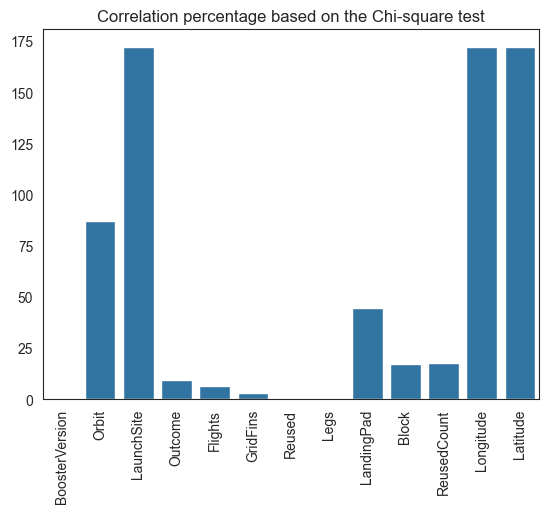

In [23]:
my_chi2(df['LaunchSite'], df_ch)

In [24]:
df['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    53
KSC LC 39A      20
VAFB SLC 4E     13
Name: count, dtype: int64

In [25]:
import numpy as np 

In [26]:
df['LaunchSite'] = df['LaunchSite'].replace(np.nan , 'CCAFS SLC 40')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     90 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      90 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

# <font color='purple'> LandingPad </font>
### <font color='red'>  چون تعداد حالت هایی را که  نمی دانیم زیاد هستند اگر هم طبق ستون های دیگر پر شوند اشتباه محاسباتی حواهیم داشت </font>
###  <font color='red'>  می توانیم این داده ها را بعنوان یک حالت جدید در نظر بگیریم یعنی حالت نمی دانم </font>
fuzzy logic
### پس با این ستون کاری نداریم

## <font color='darkcyan' >3 -  حذف ستون های نا مرتبط با  ستون هدف </fomt>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     90 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      90 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

###  <font color='darkcyan' >  ستون هایی زیر در این دیتاست  نمی توانند ارتباطی با فرود موفقیت آمیز  فالکن داشته باشند </font>
-  FlightNumber
-  Date 
-  BoosterVersion
-  Longitude
-  Latitude


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     90 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      90 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

In [30]:
df = df.drop(['FlightNumber','Date','BoosterVersion','Longitude','Latitude' ] , axis = 1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   Outcome      90 non-null     object 
 4   Flights      90 non-null     int64  
 5   GridFins     90 non-null     bool   
 6   Reused       90 non-null     bool   
 7   Legs         90 non-null     bool   
 8   LandingPad   64 non-null     object 
 9   Block        90 non-null     int64  
 10  ReusedCount  90 non-null     int64  
 11  Serial       90 non-null     object 
 12  Class        90 non-null     int64  
dtypes: bool(3), float64(1), int64(4), object(5)
memory usage: 7.4+ KB


------------------------------------------------

-------------------

# <font color='darkviolet'> مرحله تبدیل داده های غیر عددی به داده های عددی </font>

# dummy variable 
 - متغیر ساختگی
  - object -> هر مقداری در یک ستون با این ویژگی به یک ستون جدید با مقادیر 0 یا 1 تبدیل می شود

In [32]:
df_dummy = pd.get_dummies(df[['PayloadMass','Orbit','LaunchSite' , 'Outcome' , 'LandingPad', 'Block' , 'ReusedCount' ,'Serial' ]] , dtype=int)

In [33]:
df_dummy

,PayloadMass,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104.959412,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8469.125000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15400.000000,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15400.000000,5,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15400.000000,5,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## <font color='blue'> ستون های  boolian
## این ستون ها را جدا می کنیم و آنها را نیز به  عدد تبدیل می کنیم

In [34]:
df_bool = df[['GridFins','Reused','Legs']].astype(int)

In [35]:
df_bool

,GridFins,Reused,Legs
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
85,1,1,1
86,1,1,1
87,1,1,1
88,1,1,1


## <font color='blue'> تجمیع دو دیتافریم

In [36]:
df_class = df['Class']

In [37]:
df_preprocessed = pd.concat([df_bool , df_dummy , df_class] , axis = 1)

In [38]:
df_preprocessed

,GridFins,Reused,Legs,PayloadMass,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,...,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,Class
0,0,0,0,6104.959412,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,525.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,677.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,8469.125000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,3170.000000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,1,1,15400.000000,5,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
86,1,1,1,15400.000000,5,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
87,1,1,1,15400.000000,5,5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
88,1,1,1,15400.000000,5,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


-------------------

## <font color='darkviolet'> ذخیره سازی دیتا فریم  در یک فایل 

In [39]:
df_preprocessed.to_excel('preprocessed.xlsx')